In [22]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import os

if not os.path.exists("images"):
    os.mkdir("images")
import matplotlib.pyplot as plt


k=1.265569250534297
import scipy.constants as ct
from pylab import * 


In [138]:
p1=pd.read_csv("p1.csv",sep=';',decimal=',')
p2=pd.read_csv("d2.csv",sep=';',decimal=',',na_filter=True,skip_blank_lines=True)
p3=pd.read_csv("d3.csv",sep=';',decimal=',',na_filter=True,skip_blank_lines=True)
p3=p3.dropna()
p2=p2.dropna()


Força cs corrent

In [63]:
p1.head()

,M,uM,I,uI,Unnamed: 4,Unnamed: 5
0,5.4,0.100000,2.6250,0.072572,NaN,NaN
1,9.4,0.100000,3.7500,0.067577,NaN,NaN
2,14.5,0.141421,4.3875,0.028137,NaN,NaN
3,20.4,0.100000,5.3350,0.045461,NaN,NaN
4,24.4,0.141421,5.9575,0.078262,NaN,NaN


In [64]:
M=p1["M"]
uM=p1["uM"]
I=p1["I"]
uI=p1["uI"]
F=M*ct.g
uF=np.sqrt((uM*ct.g)**2)

In [61]:
fig1=px.scatter(x=F,y=I**2,template='simple_white',trendline="ols",error_x=uF,error_y=uI)
   
fig1.update_xaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True
                )
fig1.update_yaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True

                )
fig1.update_layout(
xaxis_title=r'$F\text{ (N)}$',
yaxis_title=r'$I\text{ (A)}^2$'
)
fig1.write_image("P1.pdf",engine="kaleido")
results = px.get_trendline_results(fig1)
results = results.iloc[0]["px_fit_results"].summary()
print(results)
fit_results = px.get_trendline_results(fig1).px_fit_results.iloc[0]
fig1.show()
m=fit_results.params[1]
um=fit_results.bse[1]

ValueError: Cannot accept list of column references or list of columns for both `x` and `y`.

Força vs separació

In [70]:
p2

,M,uM,G,uG
0,20.4,0.100000,58.5,2.345208
1,5.4,0.100000,13.5,1.224745
2,9.4,0.100000,23.5,2.345208
3,14.8,0.141421,39.5,3.674235
4,20.4,0.100000,58.5,2.345208
5,25.8,0.141421,74.0,1.732051


In [205]:
M1=p2["M"]
uM1=p2["uM"]
A1=p2["G"]
uA1=p2["uG"]
F1=M*ct.g
uF1=np.sqrt((uM1*ct.g)**2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2129.
Date:                Sun, 30 May 2021   Prob (F-statistic):           1.32e-06
Time:                        00:38:03   Log-Likelihood:                -7.9918
No. Observations:                   6   AIC:                             19.98
Df Residuals:                       4   BIC:                             19.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0185      1.149     -3.498      0.0

/opt/conda/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.



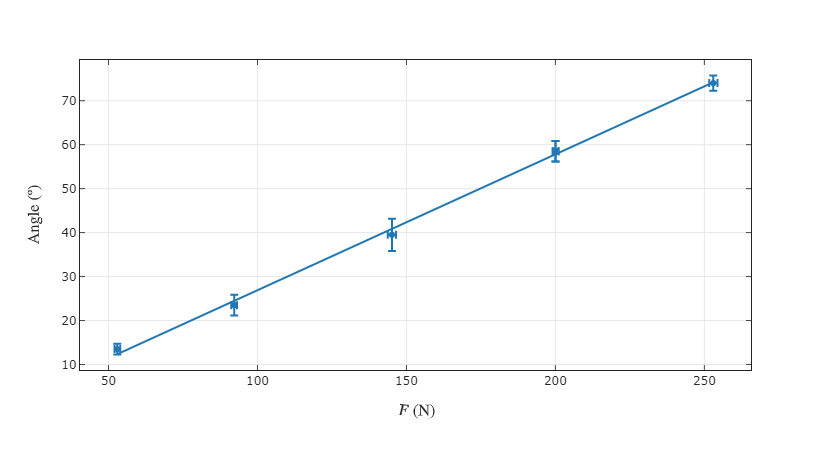

In [215]:
fig1=px.scatter(x=F1,y=A1,template='simple_white',trendline="ols",error_x=uF1,error_y=uA1)
   
fig1.update_xaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True
                )
fig1.update_yaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True

                )
fig1.update_layout(
xaxis_title=r'$F\text{ (N)}$',
yaxis_title=r'$\text{Angle (º)}$'
)
fig1.write_image("P1.pdf",engine="kaleido")
results1 = px.get_trendline_results(fig1)
results1= results1.iloc[0]["px_fit_results"].summary()
print(results1)
fit_results1 = px.get_trendline_results(fig1).px_fit_results.iloc[0]
fig1.show()
m1=fit_results1.params[1]
um1=fit_results1.bse[1]
k=m1
uk=um1

In [216]:
p3=pd.read_csv("d3.csv",sep=';',decimal=',',na_filter=True,skip_blank_lines=True)
p3=p3.dropna()
p3=p3.drop(4)
k

0.3091066405693244

In [218]:



V=p3["V"]/1000
uV=p3["u"]/1000
A=p3["D"]
uA=p3["uD"]

D1=1/V
uD1=np.sqrt(uV**2*(1/V**2)**2)
uF=np.sqrt((uA*k)**2+(uk*A)**2)


F=A*k
k

0.3091066405693244

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     149.1
Date:                Sun, 30 May 2021   Prob (F-statistic):            0.00664
Time:                        00:38:16   Log-Likelihood:                -3.7125
No. Observations:                   4   AIC:                             11.43
Df Residuals:                       2   BIC:                             10.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9816      1.294      5.395      0.0

/opt/conda/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 4 samples were given.



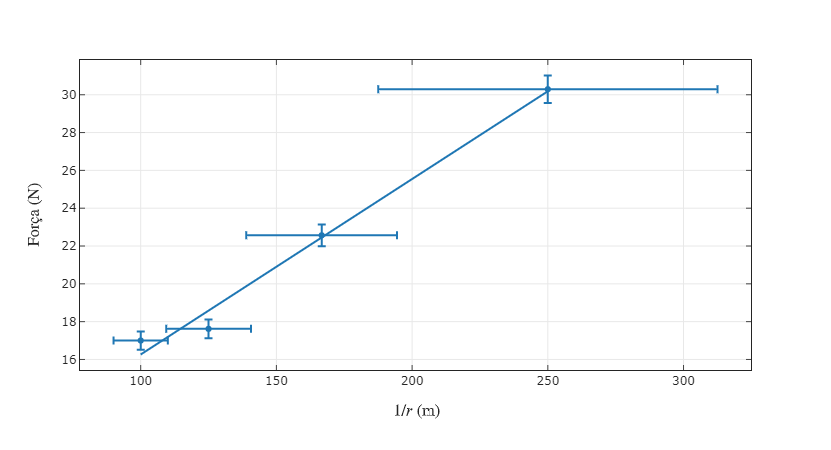

In [219]:
fig1=px.scatter(x=D1,y=F,template='simple_white',trendline="ols",error_x=uD1,error_y=uF)
   
fig1.update_xaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True
                )
fig1.update_yaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True

                )
fig1.update_layout(
xaxis_title=r'$1/r\text{ (m)}$',
yaxis_title=r'$\text{Força (N)}$'
)
fig1.write_image("P1.pdf",engine="kaleido")
results = px.get_trendline_results(fig1)
results = results.iloc[0]["px_fit_results"].summary()
print(results)
fit_results = px.get_trendline_results(fig1).px_fit_results.iloc[0]
fig1.show()
m=fit_results.params[1]
um=fit_results.bse[1]


In [170]:
I=5.39
L=
mu0=m*I**2*K/(2*np.pi)

SyntaxError: invalid syntax (<ipython-input-170-f5a8ce5e2825>, line 2)

In [202]:
k

0.0928064756986453